In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd 
data = pd.read_pickle("/content/gdrive/MyDrive/TICNN_Implementation/TICNN/final_text_df.pkl")

In [3]:

import numpy as np

#Progress bars
from tqdm import tqdm
tqdm.pandas()

#Paralelize pandas apply on multiple cores
#import swifter

from matplotlib import pyplot as plt
from matplotlib import style
#Nicer style
style.use('seaborn')
import seaborn as sns

from tensorflow import keras as k

from sklearn.model_selection import train_test_split

from gensim.models import KeyedVectors

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


df=pd.DataFrame()
data["text"] = (pad_sequences(data["text"], maxlen=400,padding="post", truncating="post")).tolist()
data["title"] = pad_sequences(data["title"], maxlen=400,padding="post", truncating="post").tolist()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data[['text', 'title']], data['type'], test_size=0.3, random_state=1)

#Train - valid
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train, y_train, test_size=0.3, random_state=1)

In [6]:
X_train_title = X_train['title']
X_train_content = X_train['text']

X_valid_title = X_valid['title']
X_valid_content = X_valid['text']

X_test_title = X_test['title']
X_test_content = X_test['text']

In [7]:
train_fit = [np.asarray(X_train_title.tolist()), 
             np.asarray(X_train_content.tolist())]

valid_fit = [np.asarray(X_valid_title.tolist()), 
             np.asarray(X_valid_content.tolist())]

test_fit = [np.asarray(X_test_title.tolist()), 
             np.asarray(X_test_content.tolist())]

In [8]:
model  = k.models.load_model("/content/gdrive/MyDrive/TICNN_Implementation/LSTM-400/lstm.h5")

In [9]:

results = model.predict(test_fit)

In [10]:
results = (results>=0.5)*1

In [11]:
cm=confusion_matrix(y_test,results)

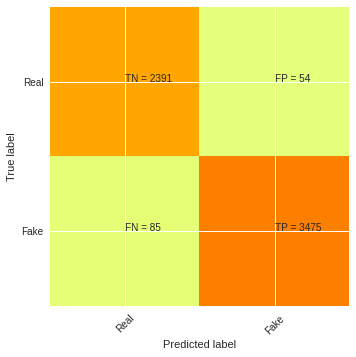

In [12]:
import matplotlib.pyplot as plt
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Real','Fake']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [13]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
precision = precision_score(y_test, results)
# recall: tp / (tp + fn)
recall = recall_score(y_test,results)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, results)
print('Precision is:'+str(precision))
print('Recall is:'+str(recall))
print('F1 score is:'+str(f1))
print('Accuracy is:'+str(accuracy_score(y_test,results)))

Precision is:0.9846982147917257
Recall is:0.976123595505618
F1 score is:0.9803921568627452
Accuracy is:0.9768526228143214
